In [4]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import display, clear_output
import time

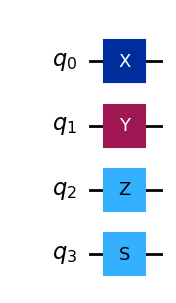

In [6]:
qc1 = QuantumCircuit(4)

# perform gate operations on individual qubits
qc1.x(0)
qc1.y(1)
qc1.z(2)
qc1.s(3)

# Draw circuit
qc1.draw('mpl')